<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:20px;
           font-family:Times New Roman;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:White;">
            <b>Types of Data</b>
        </p>
</div>

>There are different types of data in Statistics. The data are the individual pieces of factual information recorded, and it is used for the purpose of the analysis process. Data classification and data handling are important processes as it involves a multitude of tags and labels to define the data, its integrity and confidentiality. 

<center><img src="https://2.bp.blogspot.com/-IUepWeQ3HDA/VO2LddsPkDI/AAAAAAAACNU/pyoF8xyaYsg/s1600/datatypes.png" alt="Heart Disease" width="50%" width="50%"></center>

<div>
            <b>Categorical variables</b>
        </p>
</div>

<center><img src="https://miro.medium.com/max/700/1*wYbTRM0dgnRzutwZq63xCg.png" alt="Heart Disease" width="50%" width="50%"></center>

> Most of the Machine learning algorithms cannot handle categorical variables unless we convert them to numerical values. Many algorithms’ performances vary based on how Categorical variables are encoded.

> Categorical variables can be divided into two categories: Nominal (No particular order) and Ordinal (some ordered).


**Few examples as below for the Nominal variable:**

- Red, Yellow, Pink, Blue
- Singapore, Japan, USA, India, Korea
- Cow, Dog, Cat, Snake

**Example of Ordinal variables:**

- High, Medium, Low
- “Strongly agree,” Agree, Neutral, Disagree, and “Strongly Disagree.”
- Excellent, Okay, Bad

<div>
<b> There are many ways we can encode these categorical variables as numbers and use them in an algorithm. I will try to cover most of them, that are commonly used.</b>
</div>

<font color="White"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Crimson"> Introduction  </h1>

<font color="White" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">This notebook aims to:</font>
    
> **Implement and explain different methods used for categorical to numerical-encoding**

<font color="White" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">The different categorical encoding methods used in this project are:</font>

> 1.One hot encoding with Pandas (get_dummies) 

> 2.One hot encoding with Sklearn (LabelEncoder)

> 3.One hot encoding with Sklearn (OneHotEncoder)

> 4.Ordinal Encoding

> 5.Replace Method 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',2)

In [10]:
df = pd.read_csv('heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 # Attributes:
    
- **Age:** Age of the patient [years]
    
- **Sex:** Sex of the patient [M: Male, F: Female]
    
- **ChestPainType:** Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- **RestingBP:** Resting blood pressure [mm Hg]

- **Cholesterol:** Serum cholesterol [mm/dl]
    
- **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
- **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
    
- **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
    
- **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
    
- **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
- **HeartDisease:** Output class [1: heart disease, 0: Normal]

In [14]:
print(df.size)
print(df.shape)

11016
(918, 12)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [18]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [19]:
df.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

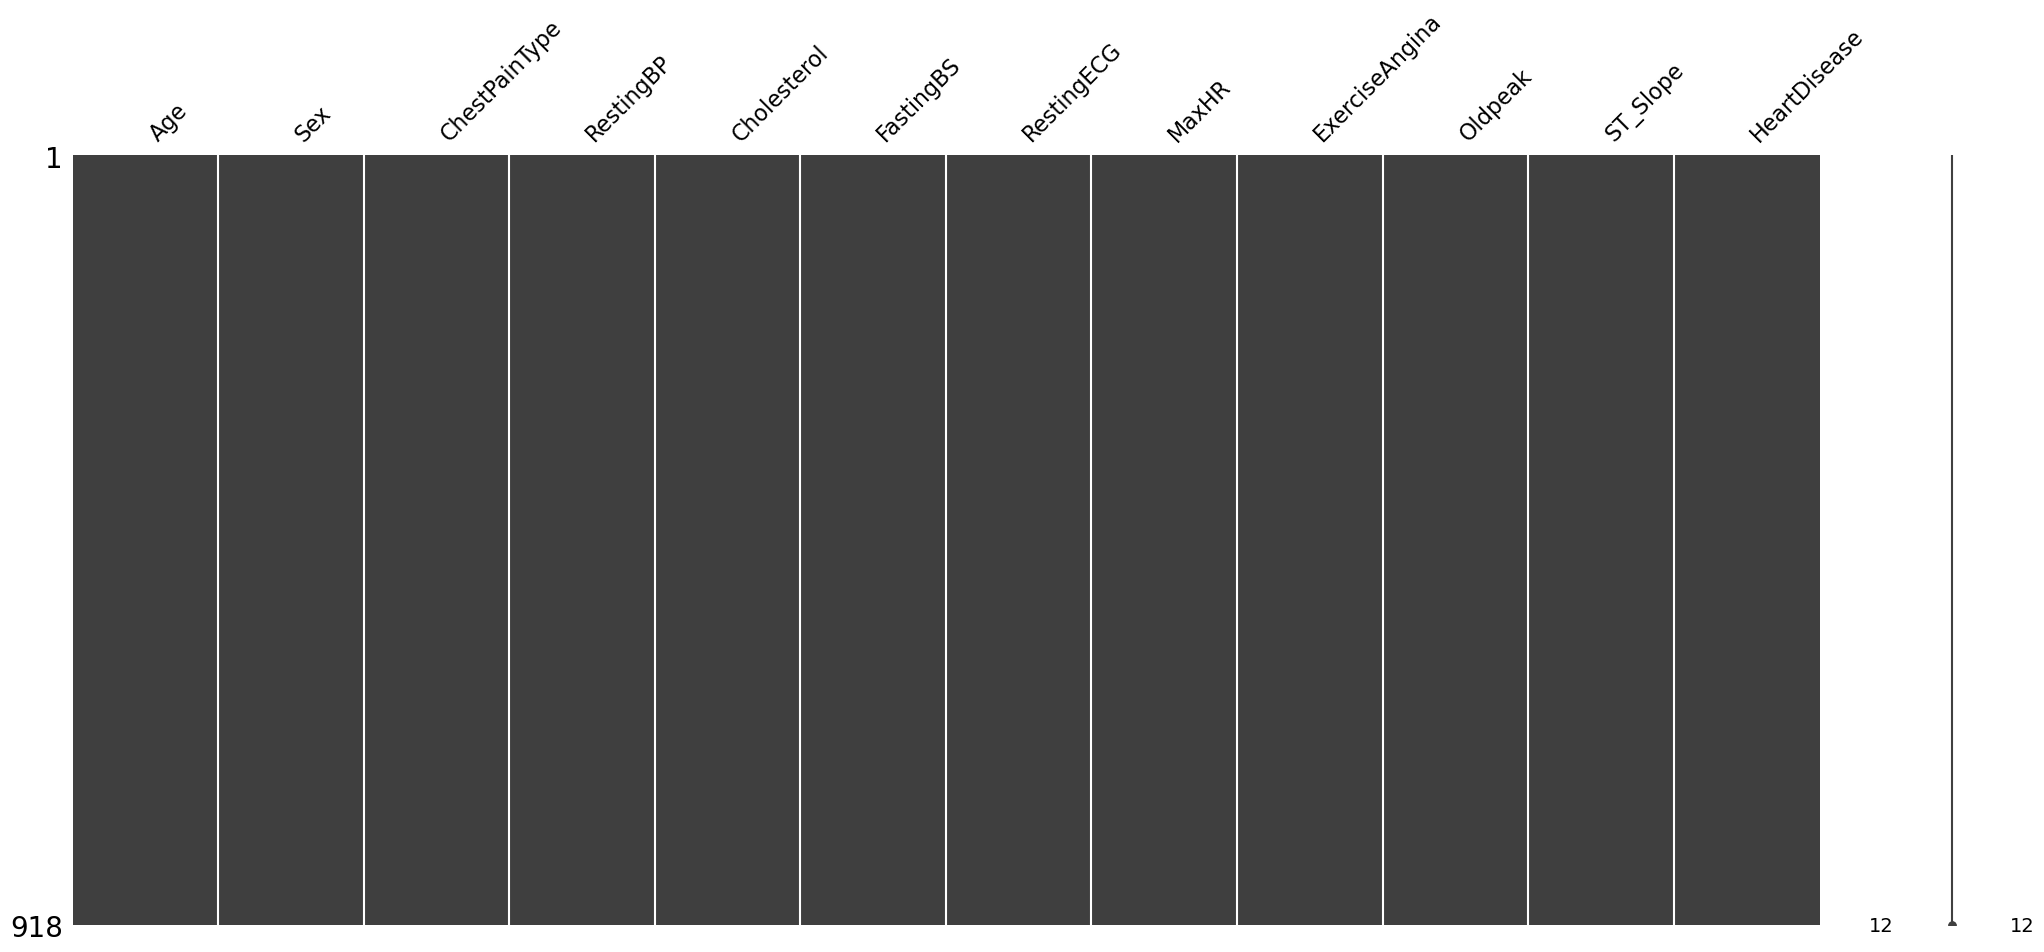

In [21]:
import missingno as msno
msno.matrix(df)
plt.show()

In [22]:
print(f'We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


<Axes: >

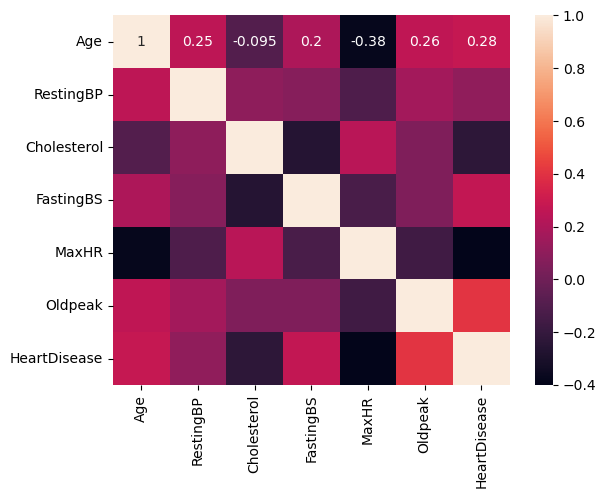

In [27]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)

<Axes: xlabel='ChestPainType', ylabel='Cholesterol'>

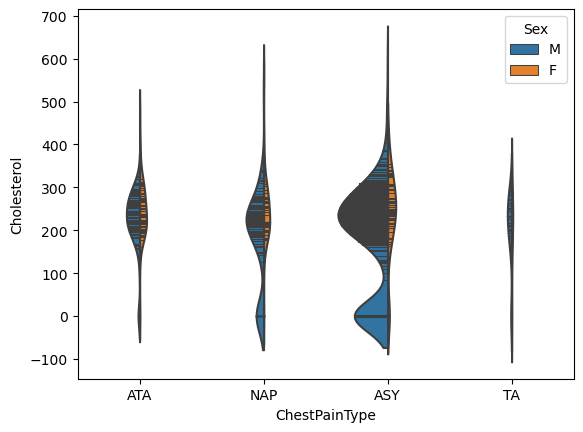

In [35]:
sns.violinplot(x='ChestPainType',y='Cholesterol',hue='Sex',data=df,split=True,scale='count',inner="stick", scale_hue=False)

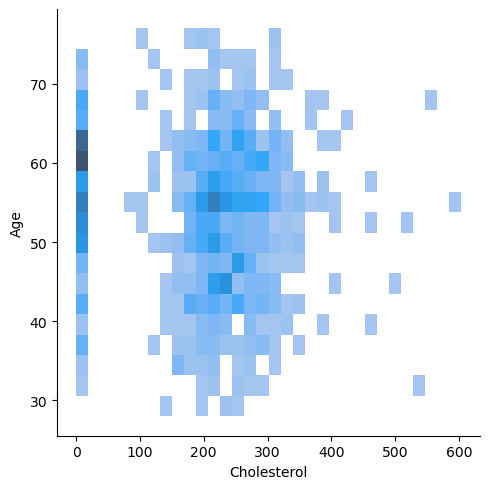

In [36]:
sns.displot(data=df,x='Cholesterol',y='Age',kind='hist')

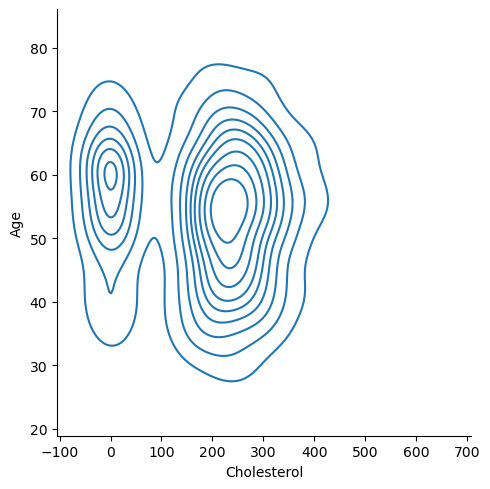

In [37]:
sns.displot(data=df,x='Cholesterol',y='Age',kind='kde')

<Axes: xlabel='count', ylabel='ChestPainType'>

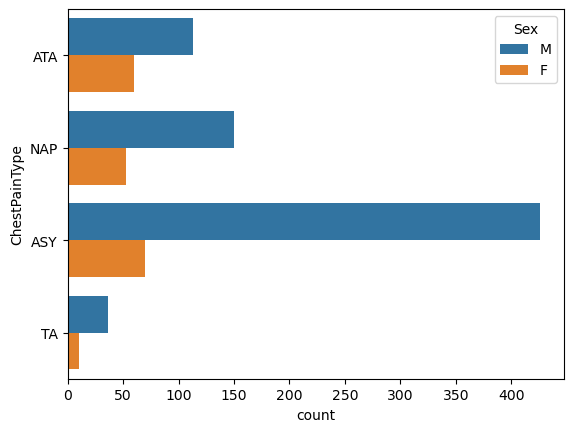

In [38]:
sns.countplot(data=df,y='ChestPainType',hue='Sex')

<div>
        <p>
            <b>What is encoding?</b>
        </p>
</div>

> Encoding is the technique we use to convert categorical entry in a dataset to a numerical data. Let say we have a dataset of employees in which there is a column that contains the information about the city location of an employee. Now we want to use this data to form a model which could predict the salary of an employee based upon his/her other details. Obviously, this model doesn’t understand anything about the city name. So how will you make the model know about it? For example, an employee who lives in a metropolitan city earns more than employees of a small city. Someway we need to make the model know about this . Yes, the way you are thinking in your mind is what we will do through code. As obvious we are thinking to rank the city based upon some spec . These ways of converting a categorical data to a numerical data are our target. 

<h2> One-Hot Encoding  </h2>

> One-Hot Encoding consists on generating a Boolean column for each category for a given qualitative variable.

**Limitation of One-Hot Encoding** 

> One-hot encoding is a very popular transformation to the categorical variables. However, it increases the data dimensionality (The Curse of Dimensionality).
When the qualitative variables in the dataset have many modalities, the transformation via one-hot encoding will lead to a significant increase in size. This is not desirable especially when the original dataset is already large.

<center><img src="https://miro.medium.com/max/552/1*80tflY8LxDFRmkD16u25RQ.png" alt="Heart Disease" width="50%" width="50%"></center>

In [39]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<h3> One hot encoding with Pandas (get_dummies)  </h3>

The Python library Pandas provides a function called get_dummies to enable one-hot encoding.

In [44]:
df1=df.copy()
X=df1.drop(columns='HeartDisease',axis=1)
y=df1['HeartDisease']
X['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64